## Bagging and random forests

#### Raphaël Teboul

**Math question**

Each prediction of a classifier is correct with a p probability. Thus each prediction is a a bernoulli trial of a p probability. By independence, the prediction of an L aggregated model which is the averaged sum of each bernoulli trial follows a binomial distribution of parameters : p, L. 

In [44]:
# A few tacticals imports
from __future__ import division
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pylab
import random
import sklearn
from sklearn import preprocessing
from sklearn import tree
from sklearn import datasets
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from scipy.stats import binom

sns.set(color_codes=True)
pylab.rcParams['figure.figsize'] = (15, 10)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
p = 0.7
L = 10
rv = binom(L, p)


1) 

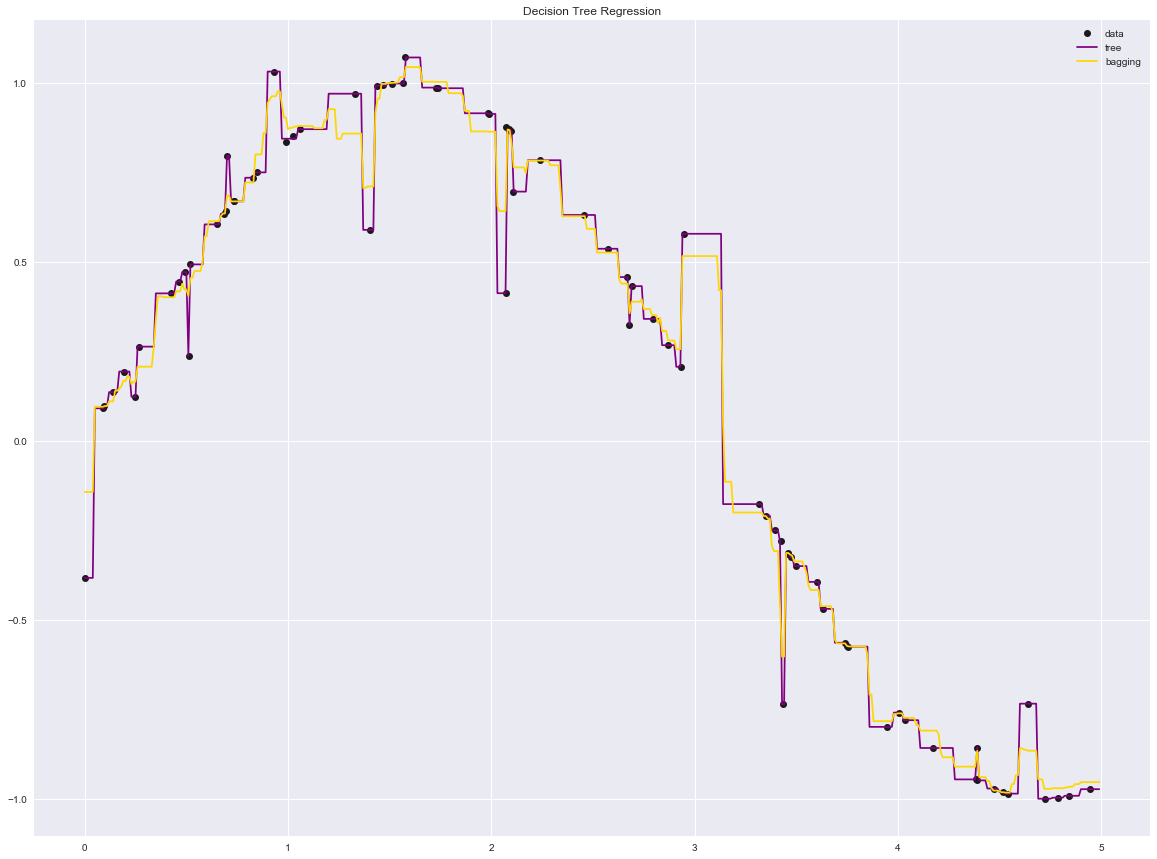

In [46]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

#  regressor by bagging stumps
clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
clf.fit(X, y.astype('double'))

bagging = BaggingRegressor(clf, n_estimators=n_estimators)
bagging.fit(X, y.astype('double'))

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = clf.predict(X_test)
y_bagging = bagging.predict(X_test)

  # Plot the results
plt.figure(figsize=(20, 15))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot( X_test, y_tree, c='purple', label = 'tree')
plt.plot(X_test,  y_bagging, c='gold', label ="bagging")

# plot for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

2)

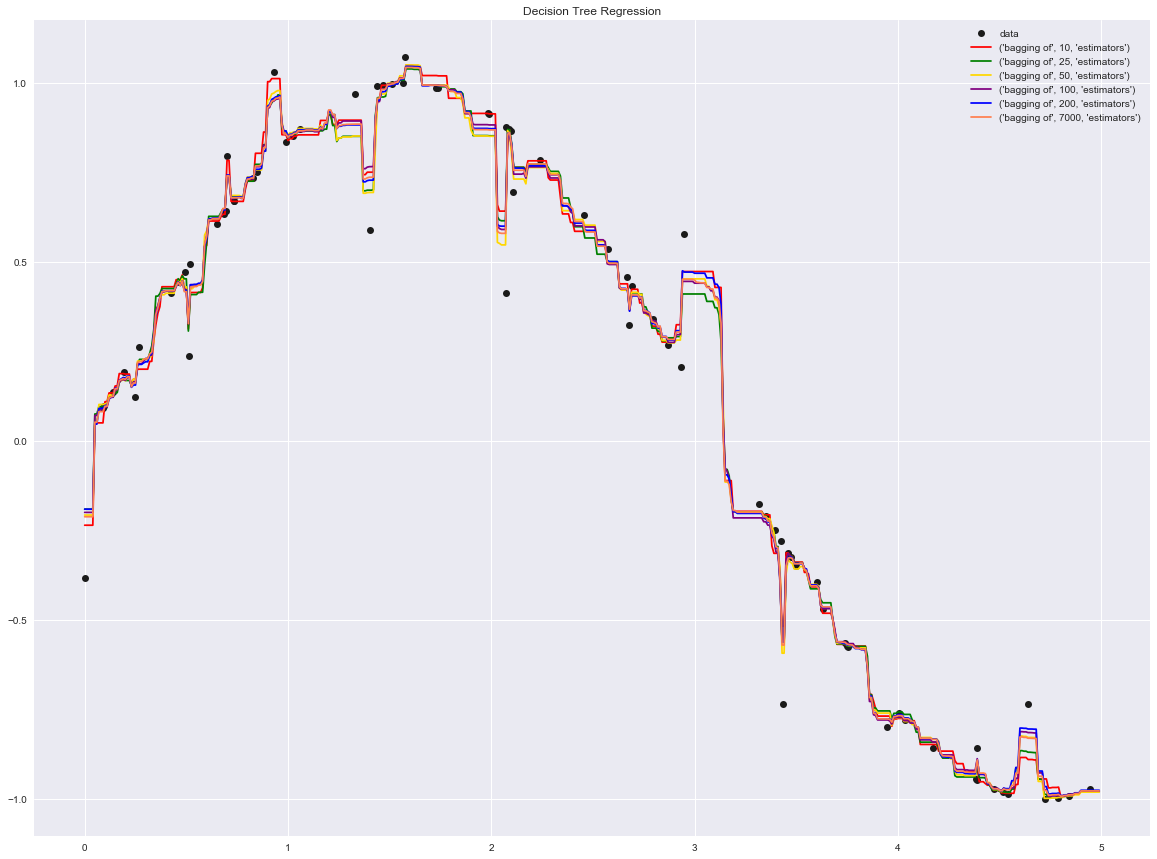

In [47]:
differentsL = [10, 25, 50, 100, 200, 7000]
colors = ["red", "green", "gold", "purple", "blue", "coral"]


tree_max_depth = 10
bagging_max_depth = 10
clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
clf.fit(X, y.astype('double'))
y_tree = clf.predict(X_test)
        
plt.figure(figsize=(20, 15))
plt.plot(X, y, 'o', c="k", label="data")
        
for i in range(len(differentsL)):
        n_estimators = differentsL[i] # L in the text

        bagging = BaggingRegressor(clf, n_estimators=n_estimators)
        bagging.fit(X, y.astype('double'))


        X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
        y_bagging = bagging.predict(X_test)


        #plt.plot(X_test, y_tree, c=colors[i], label = 'tree')
        plt.plot(X_test,  y_bagging, c=colors[i], label =("bagging of", differentsL[i],"estimators"))

plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()     

As L has no incidence on a tree (!), we only displayed the result of the baggings. As it would be expected, when L goes up it reduces the noice of the result and tends towards the object (here, a sine). Yet, as L goes up by a factor k the variance decays in $\frac{1}{k^{2}}$, so the variance is reduced. However, as the result for L = 7000 isn't perfect, that shows that the trees estimators are biaised and no bagging what so ever could be a solution to that problem.

Let's see the result when the tree_depth changes and L stays constant. 

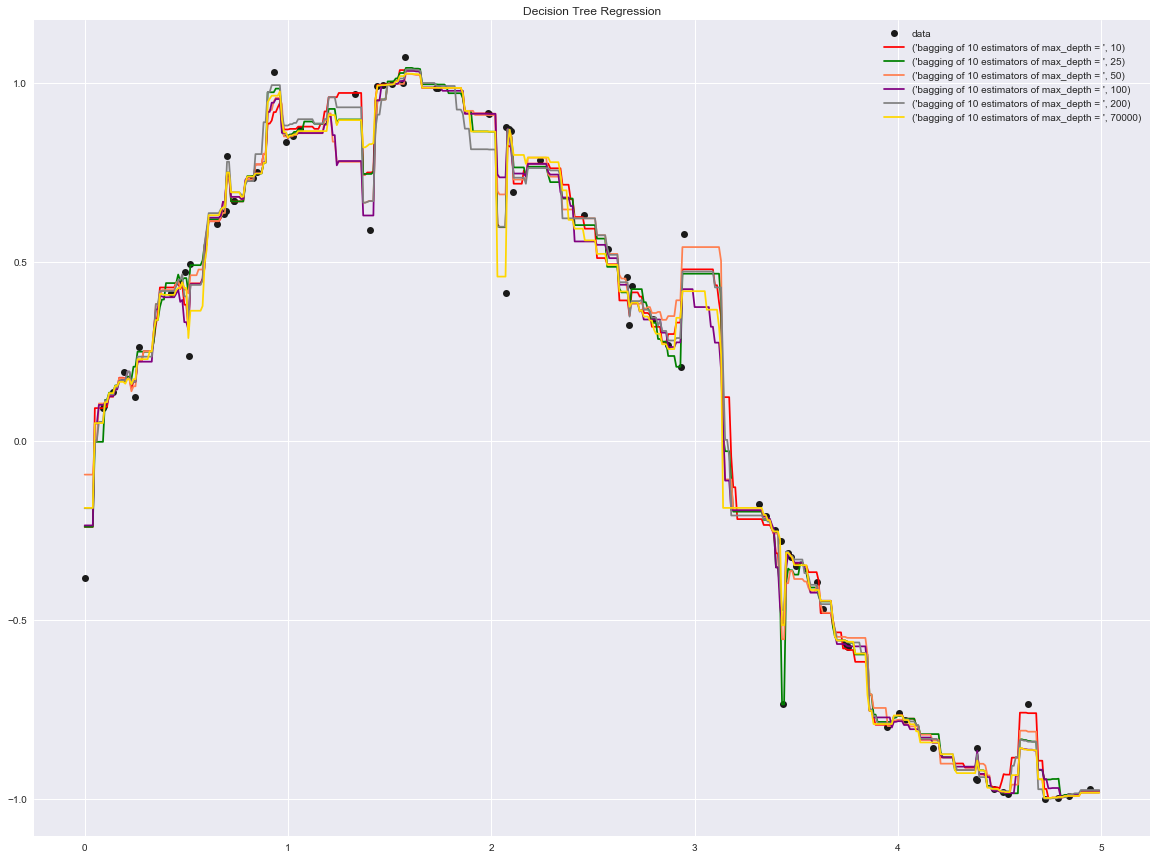

In [48]:
depth = [10, 25, 50, 100, 200, 70000]
colors = ["red", "green", "coral", "purple", "grey", "gold"]


n_estimators = 10
bagging_max_depth = 10
clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
clf.fit(X, y.astype('double'))
y_tree = clf.predict(X_test)
        
plt.figure(figsize=(20, 15))
plt.plot(X, y, 'o', c="k", label="data")
        
for i in range(len(differentsL)):
        tree_max_depth = depth[i]
        bagging = BaggingRegressor(clf, n_estimators=n_estimators)
        bagging.fit(X, y.astype('double'))


        X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
        y_bagging = bagging.predict(X_test)


        #plt.plot(X_test, y_tree, c=colors[i], label = 'tree')
        plt.plot(X_test,  y_bagging, c=colors[i], label =("bagging of 10 estimators of max_depth = ", depth[i]))

plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()     

Even for a really great maximal depth, we see that the result isn't perfect : thus the tree estimators are biaised. 

3) See the comments of the last question.

4)

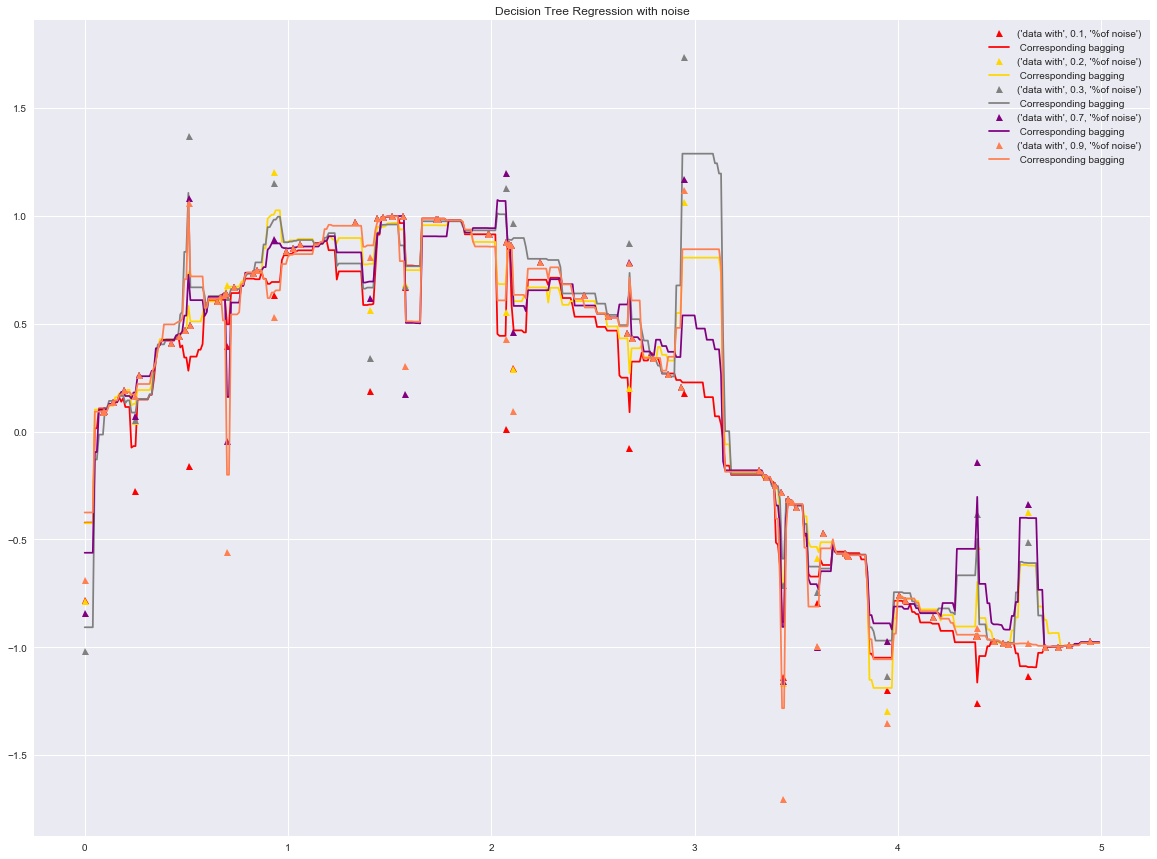

In [49]:
noise = [0.1, 0.2, 0.3, 0.7, 0.9]

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
bagging = BaggingRegressor(clf, n_estimators=n_estimators)

plt.figure(figsize=(20, 15))

for i in range(len(noise)):
    y[::5] += 1 * (noise[-i] - rng.rand(16))

    clf.fit(X, y.astype('double'))

    bagging.fit(X, y.astype('double'))

# Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = clf.predict(X_test)
    y_bagging = bagging.predict(X_test)

  # Plot the results
    plt.plot(X, y, '^', c=colors[-i], label=("data with", noise[i], "%of noise"))
    #plt.plot( X_test, y_tree, c='purple', label = 'tree')
    plt.plot(X_test,  y_bagging, c=colors[-i], label =" Corresponding bagging")


    plt.title("Decision Tree Regression with noise" )
    plt.legend(loc=1, numpoints=1)
plt.show()

5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


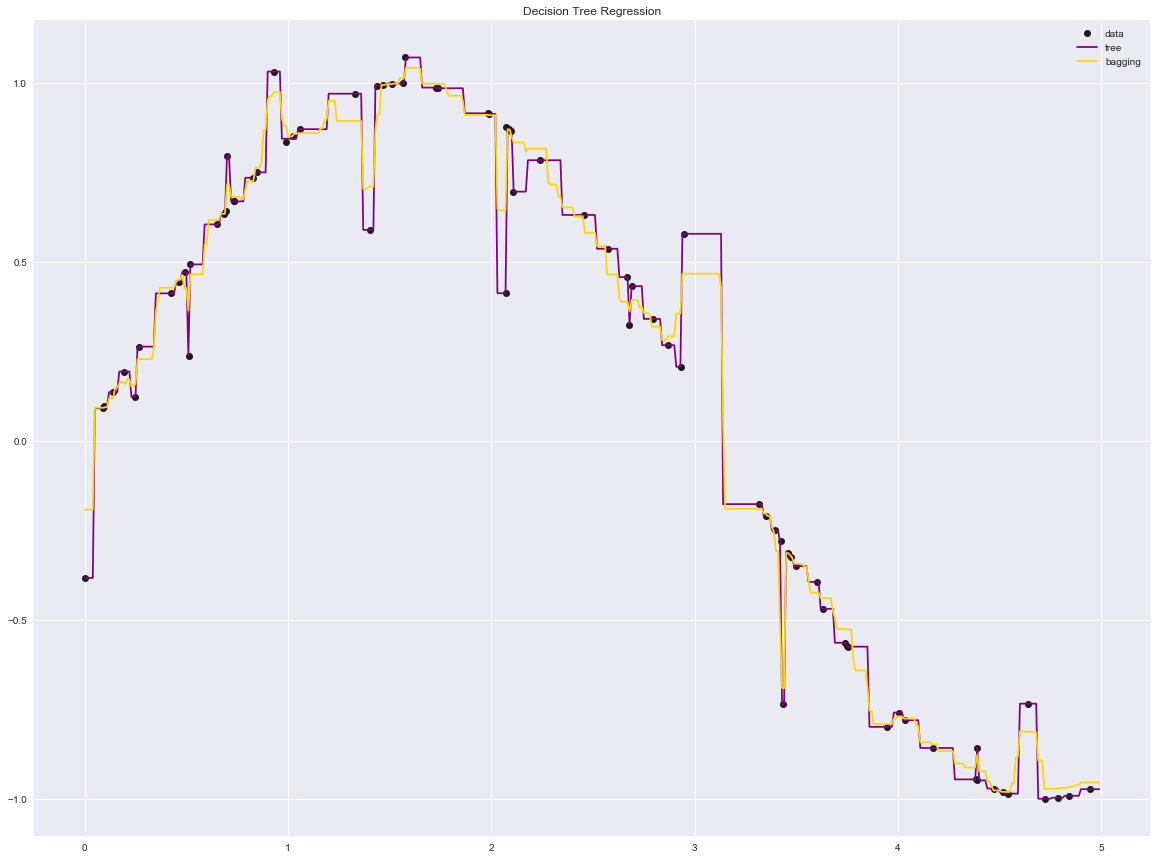

In [50]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
for i in range (len(X)-1):
    if ((X[i]-X[i+1])<0.01):
        np.delete(X, X[i])
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
clf.fit(X, y.astype('double'))

bagging = BaggingRegressor(clf, n_estimators=n_estimators)
bagging.fit(X, y.astype('double'))

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = clf.predict(X_test)
y_bagging = bagging.predict(X_test)

  # Plot the results
plt.figure(figsize=(20, 15))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot( X_test, y_tree, c='purple', label = 'tree')
plt.plot(X_test,  y_bagging, c='gold', label ="bagging")

plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

6)

In [51]:
from sklearn import datasets

digits = datasets.load_digits()
boston = datasets.load_boston()
diabetes = datasets.load_diabetes()
iris = datasets.load_iris()

X1 = digits.data
y1 = digits.target
X1_train,X1_test,y1_train,y1_test = sklearn.model_selection.train_test_split(X1,y1,test_size=0.33)

X2 = boston.data
y2 = boston.target
X2_train,X2_test,y2_train,y2_test = sklearn.model_selection.train_test_split(X2,y2,test_size=0.33)

X3 = diabetes.data
y3 = diabetes.target
X3_train,X3_test,y3_train,y3_test = sklearn.model_selection.train_test_split(X3,y3,test_size=0.33)

X4 = iris.data
y4 = iris.target
X4_train,X4_test,y4_train,y4_test = sklearn.model_selection.train_test_split(X4,y4,test_size=0.33)

In [52]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

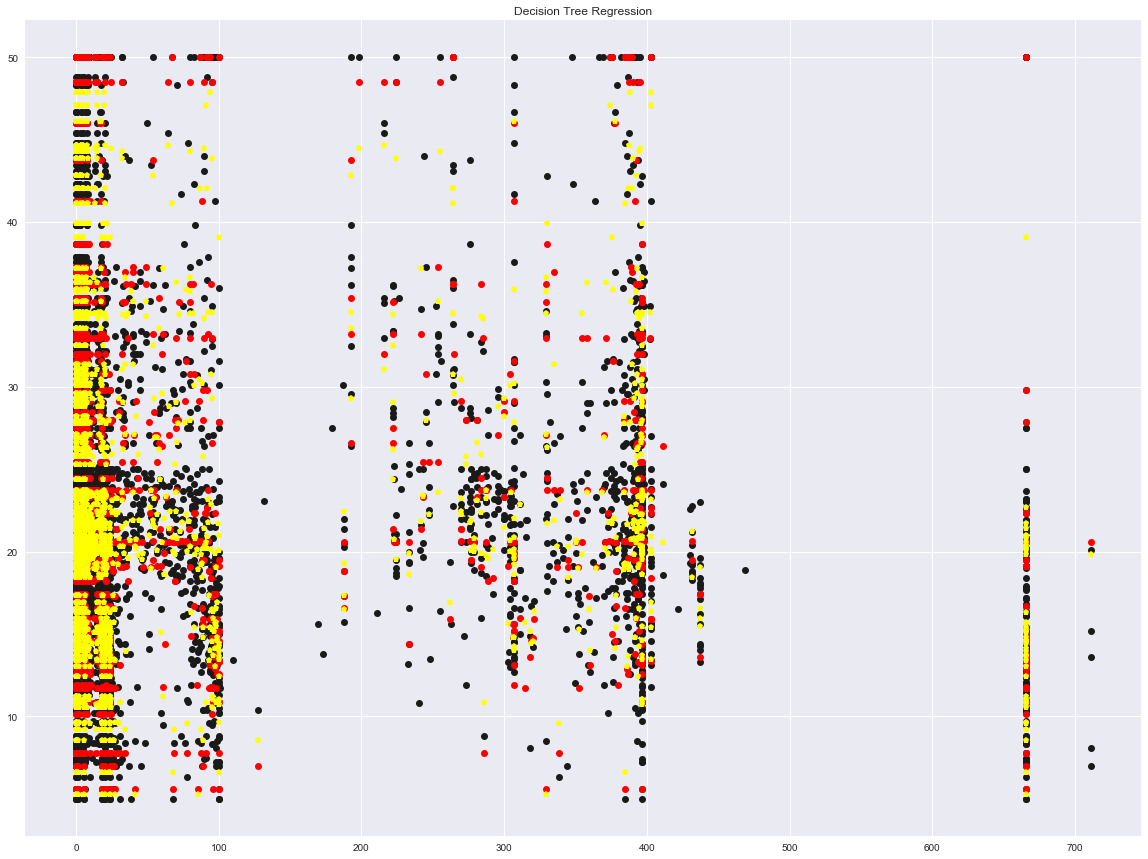

In [53]:
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

#  regressor by bagging stumps
clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
clf.fit(X2_train, y2_train)

bagging = BaggingRegressor(clf, n_estimators=n_estimators)
bagging.fit(X2_train, y2_train)

# Predict
y2_tree = clf.predict(X2_test)
y2_bagging = bagging.predict(X2_test)

  # Plot the results
plt.clf()
plt.figure(figsize=(20, 15))
plt.plot(X2, y2, 'o', c="k", label="data")
plt.plot(X2_test, y2_tree,'o',  c='red', label = 'tree')
plt.plot(X2_test,  y2_bagging, 'p', c='yellow', label ="bagging")

# plot for Bagging/Tree
plt.title("Decision Tree Regression")
plt.show()

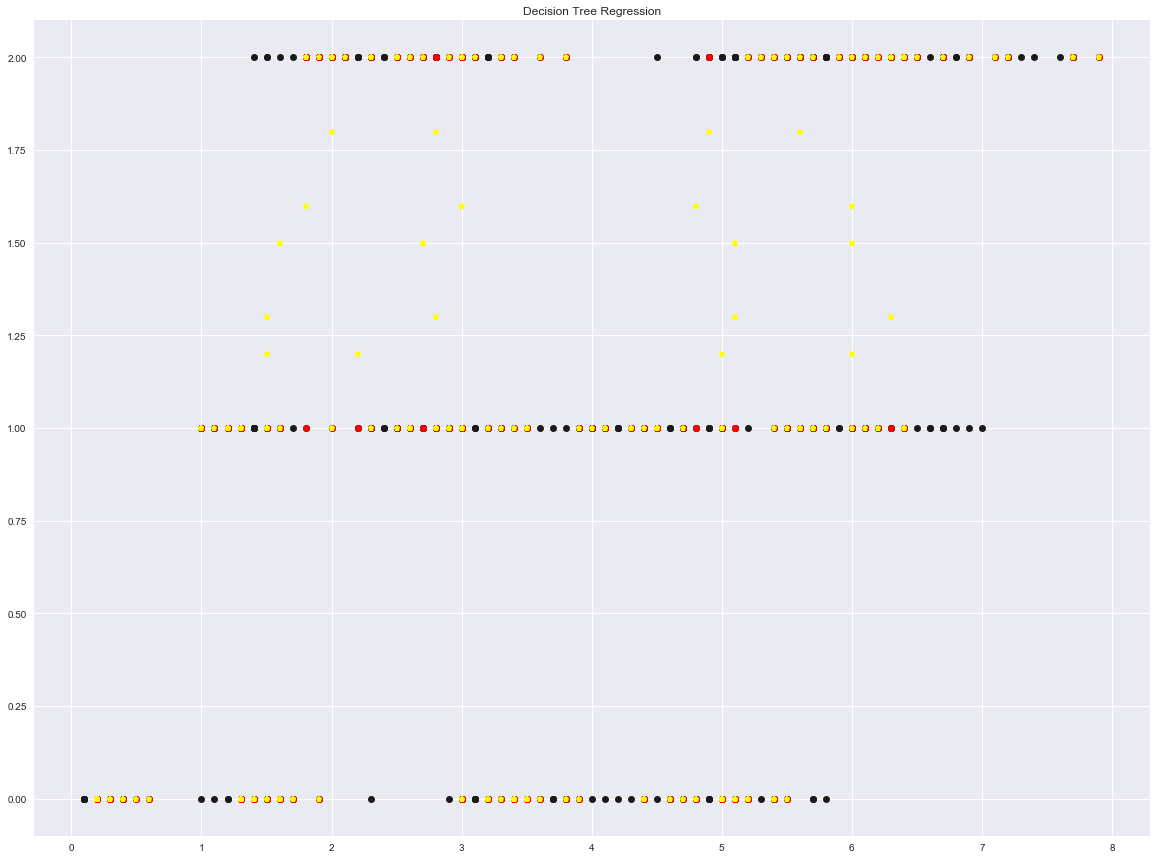

In [55]:
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

#  regressor by bagging stumps
clf = tree.DecisionTreeRegressor(max_depth=tree_max_depth)
clf.fit(X4_train, y4_train)

bagging = BaggingRegressor(clf, n_estimators=n_estimators)
bagging.fit(X4_train, y4_train)

# Predict
y4_tree = clf.predict(X4_test)
y4_bagging = bagging.predict(X4_test)

  # Plot the results
plt.clf()
plt.figure(figsize=(20, 15))
plt.plot(X4, y4, 'o', c="k", label="data")
plt.plot(X4_test, y4_tree,'o',  c='red', label = 'tree')
plt.plot(X4_test,  y4_bagging, 'p', c='yellow', label ="bagging")

# plot for Bagging/Tree
plt.title("Decision Tree Regression")
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
  # Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
  # Standardize
X = preprocessing.scale(X_unscaled)
  # RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
  # Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.figure()
Xtest = iris.data[:3, :1]
X_test = preprocessing.scale(Xtest)

for tree in model.estimators_:
      # TODO use predict to obtain the probabilities you will store in Z
    Z = clf.predict_proba(X4_test)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
  # Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
            cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 4 